## 0.0 Set seed

In [1]:
import numpy as np
#numpy.random.seed(030224)
#SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers
RANDOM_SEED = 0o30224
np.random.seed(RANDOM_SEED)

## 1. 0 Data Selection: Read created dataset and clean Imported Lyrics

In [2]:
import pandas as pd 

#Read data
#https://data.mendeley.com/datasets/3t9vbwxgr5/3
music_data = pd.read_csv("tcc_ceds_music.csv")

# Filter data between 1995 and 2019, inclusive to use more recent songs (hip-hop enters the dataset in 1995)
start_year = 1995
end_year = 2019

# Filter the DataFrame
music_data_filtered = music_data[(music_data['release_date'] >= start_year) & (music_data['release_date'] <= end_year)]
music_data_filtered.reset_index(inplace=True)
music_data_filtered.describe()

,index,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
count,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,...,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,1.249600e+04,12496.000000,12496.000000,12496.000000,12496.000000
mean,16845.595711,50782.818022,2007.947743,83.007282,0.018080,0.138303,0.114094,0.053817,0.020265,0.014997,...,0.029331,0.117340,0.029436,0.557583,0.723267,2.333459e-01,0.083552,0.500172,0.652605,0.172175
std,7784.210826,23164.555535,7.157760,44.969139,0.044598,0.184803,0.164991,0.105598,0.043398,0.036608,...,0.058834,0.172240,0.067016,0.175644,0.085696,2.796698e-01,0.217738,0.241964,0.217147,0.102254
min,4252.000000,12322.000000,1995.000000,1.000000,0.000291,0.000291,0.000291,0.000291,0.000291,0.000291,...,0.000291,0.000291,0.000297,0.043648,0.101402,3.012051e-07,0.000000,0.000000,0.000000,0.014286
25%,11011.750000,32808.750000,2002.000000,49.000000,0.000810,0.001053,0.001032,0.000892,0.000907,0.000810,...,0.000863,0.000993,0.000877,0.437886,0.682640,1.375403e-02,0.000000,0.308533,0.507492,0.085714
50%,16812.500000,53599.500000,2008.000000,74.000000,0.001316,0.034339,0.007519,0.001754,0.001595,0.001316,...,0.001504,0.003509,0.001595,0.561356,0.740020,1.044168e-01,0.000042,0.498145,0.681171,0.171429
75%,23040.250000,69171.250000,2014.000000,108.250000,0.003509,0.280467,0.174875,0.063085,0.019885,0.004785,...,0.033701,0.185972,0.032095,0.684826,0.782581,3.775094e-01,0.007971,0.690849,0.827822,0.257143
max,28371.000000,82451.000000,2019.000000,199.000000,0.537594,0.981781,0.950139,0.921053,0.485646,0.502873,...,0.594459,0.981424,0.921053,0.993502,1.000000,1.000000e+00,0.996964,0.996908,1.000000,0.357143


### Preprocessing

In [3]:
import re 
import nltk
import string
from nltk.corpus import words, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


# Ensure that NLTK's resources are downloaded
#nltk.download('words')
#nltk.download('punkt')
#nltk.download('stopwords')

# Load English stopwords and words
stop_words = set(stopwords.words('english'))
stop_words.update(["know", "cause", "come","yeah","want","like","got","commercial","lyric"])
english_words = set(words.words())

# Initialize the PorterStemmer and WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to preprocess lyrics
def preprocess_words(text, use_stemming=False, use_lemmatization=False):
    # Convert to lowercase
    text = text.lower()

    # Patterns for explicit words found in the lyrics
    patterns = [
        r'\bf\w*ck\w*\b', r'\bs\w*t\w*\b', r'\bb\w*tch\w*\b', 
        r'\bp\w*ssy\w*\b', r'\bn\w*gg\w*\b' 
    ]
    combined_pattern = '|'.join(patterns)

    # Remove words matching the patterns
    text = re.sub(combined_pattern, '', text, flags=re.IGNORECASE)

    # Tokenize and filter out non-English words and punctuation
    tokens = word_tokenize(text)
    
    filtered_tokens = [word for word in tokens if word in english_words and word not in string.punctuation]

    # Remove stopwords
    filtered_tokens = [word for word in filtered_tokens if word not in stop_words]

    # Apply stemming or lemmatization if needed
    if use_stemming:
        filtered_tokens = [stemmer.stem(token) for token in filtered_tokens]
    elif use_lemmatization:
        filtered_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    return ' '.join(filtered_tokens)

# Apply the function to the lyrics column 
music_data_filtered['lyrics_processed'] = music_data_filtered['lyrics'].apply(preprocess_words)

# Create a lemmatized set of lyrics
music_data_filtered['lyrics_lemm'] = music_data_filtered['lyrics_processed'].apply(lambda x: preprocess_words(x, use_lemmatization=True))



/var/folders/4f/490j_6014cx3dsntw9l_7lh40000gn/T/ipykernel_53442/1999309338.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_data_filtered['lyrics_processed'] = music_data_filtered['lyrics'].apply(preprocess_words)
/var/folders/4f/490j_6014cx3dsntw9l_7lh40000gn/T/ipykernel_53442/1999309338.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_data_filtered['lyrics_lemm'] = music_data_filtered['lyrics_processed'].apply(lambda x: preprocess_words(x, use_lemmatization=True))


## 1.2 Data Selection: Vizualisation

### Figure 1,  Figure 2 and Figure 3

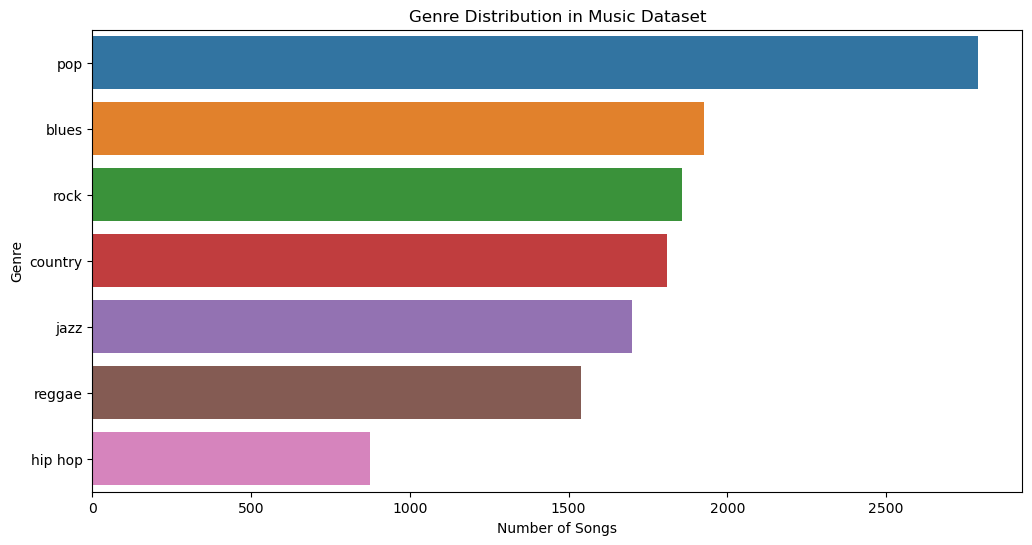

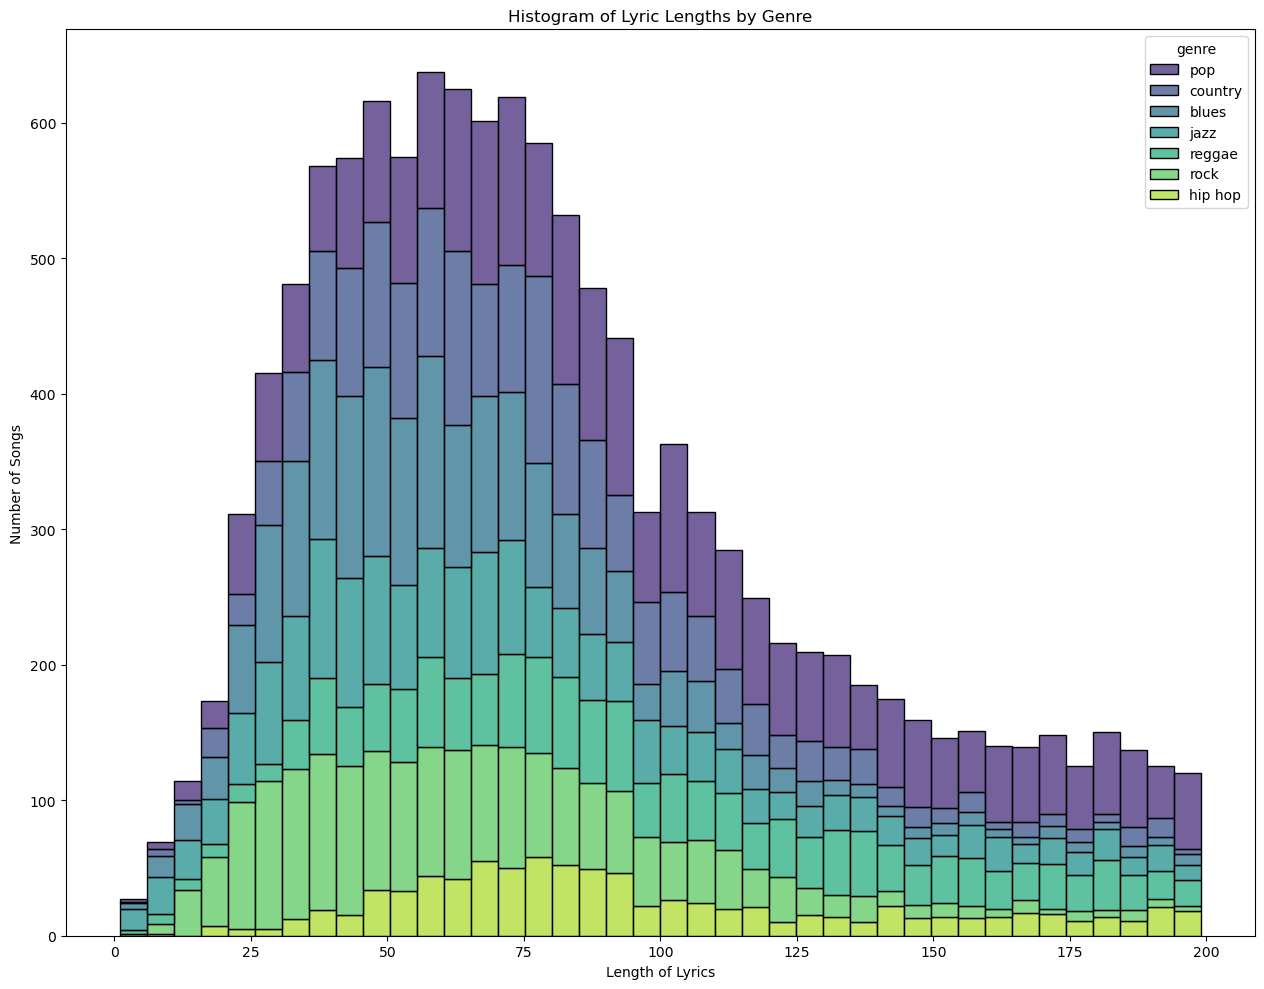

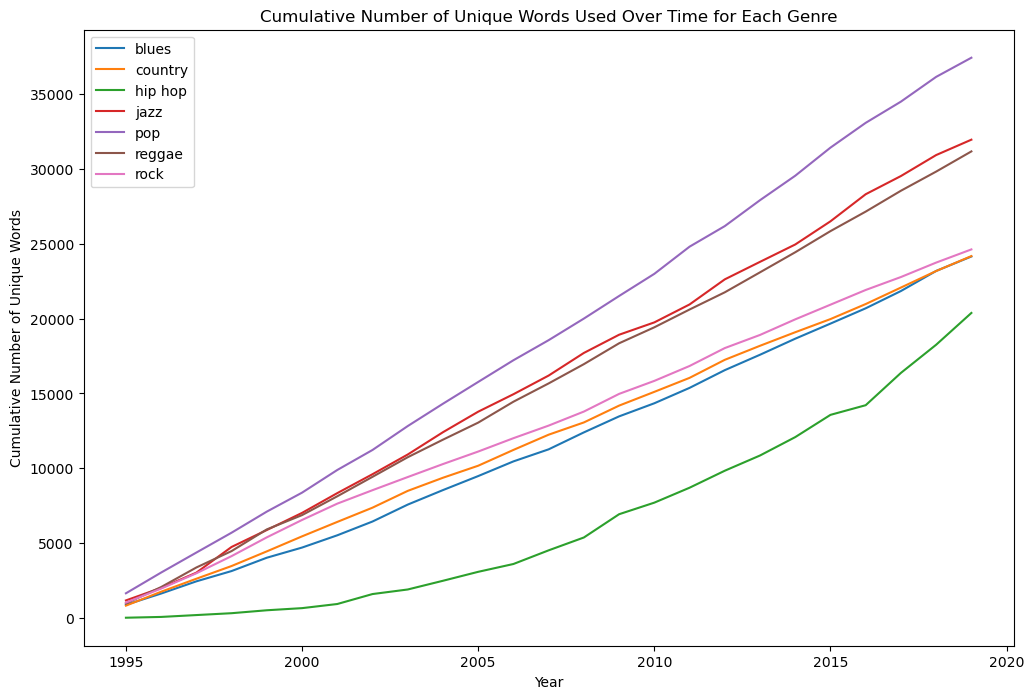

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 

# Genre bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.countplot(y=music_data_filtered['genre'], order=music_data_filtered['genre'].value_counts().index)
plt.title('Genre Distribution in Music Dataset')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.savefig('1_genre_distribution.png')  # Save the figure
plt.show()


# Creating a histogram of lyric length broken down by genre
plt.figure(figsize=(15, 10))
histplot = sns.histplot(data=music_data_filtered, x='len', bins=40, hue='genre', multiple="stack", palette='viridis')
plt.title('Histogram of Lyric Lengths by Genre')
plt.xlabel('Length of Lyrics')
plt.ylabel('Number of Songs')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig('2_lyric_length_distribution.png')  # Save the figure
plt.show()

# Grouping the data by 'genre' and 'release_date', and calculating unique words
unique_words_over_time = music_data_filtered.groupby(['genre', 'release_date']).apply(lambda x: pd.Series({
    'Unique Words': len(set(" ".join(x['lyrics_processed']).split()))
})).reset_index()

# Displaying the first few rows of the unique_words_over_time DataFrame
unique_words_over_time.head()

# Calculating cumulative unique words over time for each genre
cumulative_unique_words = unique_words_over_time.copy()
cumulative_unique_words['Cumulative Unique Words'] = cumulative_unique_words.groupby('genre')['Unique Words'].cumsum()

# Plotting
plt.figure(figsize=(12, 8))

for genre in cumulative_unique_words['genre'].unique():
    genre_data = cumulative_unique_words[cumulative_unique_words['genre'] == genre]
    plt.plot(genre_data['release_date'], genre_data['Cumulative Unique Words'], label=genre)

plt.xlabel('Year')
plt.ylabel('Cumulative Number of Unique Words')
plt.title('Cumulative Number of Unique Words Used Over Time for Each Genre')
plt.legend()
plt.savefig('3_unique_words_time.png')  # Save the figure
plt.show()

### Undersample data to ensure even classes 

In [5]:
#First we undersample the data due to genre imbalances
## Find the least frequent genre and its count
genre_counts = music_data_filtered['genre'].value_counts()
least_frequent_genre_count = round(genre_counts.min())

## Initialize an empty DataFrame to store the undersampled data
undersampled_data = pd.DataFrame()

## Loop over each genre and downsample
for genre in music_data_filtered['genre'].unique():
    genre_data = music_data_filtered[music_data_filtered['genre'] == genre]
    # If the genre is the least frequent one, take all samples
    # Otherwise, randomly sample without replacement
    sampled_genre_data = genre_data.sample(
        n=least_frequent_genre_count,
        random_state=RANDOM_SEED,  # for reproducibility
        replace=False    # important for undersampling without replacement
    )
    undersampled_data = pd.concat([undersampled_data, sampled_genre_data])

undersampled_data.describe()

,index,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
count,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,...,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6.118000e+03,6118.000000,6118.000000,6118.000000,6118.000000
mean,18657.422033,56098.871363,2008.421870,83.605100,0.017090,0.133057,0.112747,0.051895,0.019454,0.015014,...,0.029382,0.109021,0.028943,0.573459,0.720776,2.344727e-01,0.084351,0.511050,0.650241,0.165402
std,7497.266077,21981.554768,7.095741,44.925852,0.043288,0.181302,0.166315,0.103648,0.042840,0.036428,...,0.060597,0.167088,0.066617,0.178718,0.086023,2.781498e-01,0.220314,0.242254,0.214376,0.101368
min,4253.000000,12324.000000,1995.000000,1.000000,0.000291,0.000291,0.000291,0.000291,0.000291,0.000291,...,0.000291,0.000291,0.000297,0.043648,0.167936,6.526111e-07,0.000000,0.000000,0.004473,0.014286
25%,12025.250000,37256.750000,2003.000000,50.000000,0.000801,0.001096,0.001053,0.000907,0.000907,0.000822,...,0.000863,0.000975,0.000877,0.450883,0.679954,1.556126e-02,0.000000,0.318838,0.505490,0.071429
50%,20080.500000,61270.000000,2009.000000,75.000000,0.001284,0.028650,0.004785,0.001754,0.001548,0.001350,...,0.001462,0.002632,0.001548,0.577602,0.737918,1.074288e-01,0.000029,0.511542,0.680170,0.157143
75%,26092.750000,77383.500000,2015.000000,109.000000,0.003096,0.244572,0.169297,0.059597,0.018002,0.005263,...,0.031256,0.161415,0.030846,0.706488,0.779869,3.734933e-01,0.006574,0.705276,0.821816,0.242857
max,28371.000000,82451.000000,2019.000000,199.000000,0.475160,0.981781,0.950139,0.921053,0.485646,0.502873,...,0.594459,0.903683,0.921053,0.993502,0.944517,1.000000e+00,0.996964,0.996908,1.000000,0.357143


### Figure 4


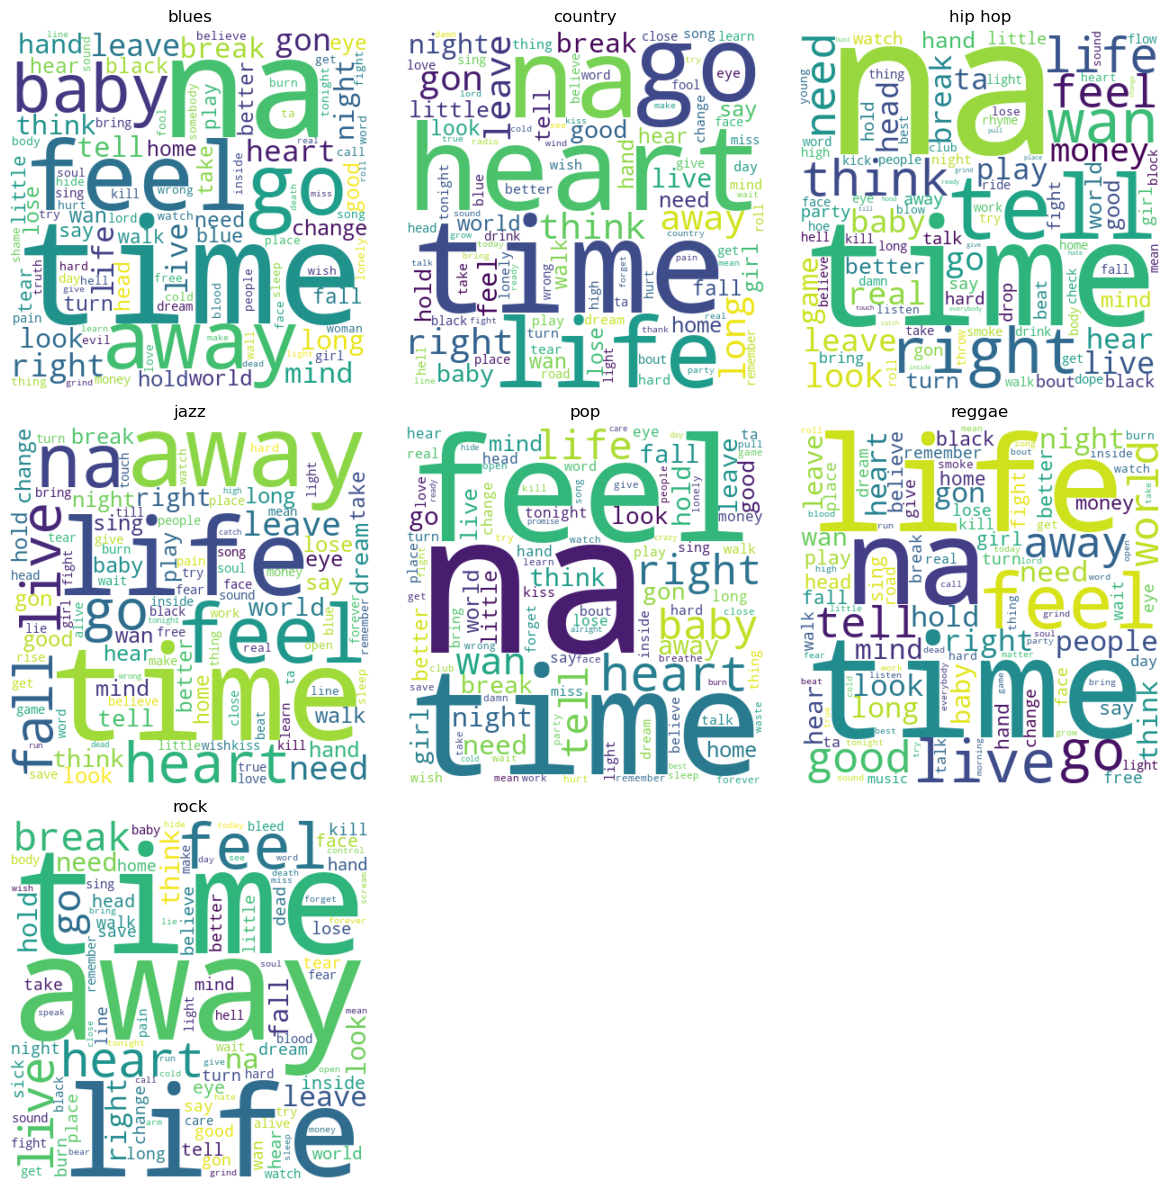

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Group by genre and join lyrics
grouped_df = undersampled_data.groupby('genre')['lyrics_lemm'].apply(' '.join).reset_index()

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(grouped_df['lyrics_lemm'])
feature_names = tfidf.get_feature_names_out()

# Get the highest scoring tfidf terms for each genre
top_n = 100  # You can change this number
top_words = {genre: [] for genre in grouped_df['genre']}
for i, genre in enumerate(grouped_df['genre']):
    scores = tfidf_matrix[i].toarray().flatten()
    sorted_indices = scores.argsort()[::-1][:top_n]
    top_words[genre] = [feature_names[idx] for idx in sorted_indices]

# Function to generate a word cloud
def generate_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)

# Create subplots
num_genres = len(grouped_df['genre'])
cols = 3  # Define how many columns you want in the subplot grid
rows = num_genres // cols + (num_genres % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, genre in enumerate(grouped_df['genre']):
    plt.subplot(rows, cols, i+1)
    word_freq = {word: tfidf_matrix[i, tfidf.vocabulary_[word]] for word in top_words[genre]}
    generate_wordcloud(word_freq, genre)

plt.tight_layout()
plt.savefig('4_wordclouds.png')  # Save the figure

plt.show()


## 2.0  Classification

## 2.1 Train relevant models for feature extraction

In [7]:
#Feature Extraction
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
    
#TFIDF already trained

# Training a Word2Vec model
# We will use the lyrics with lemmatization as it usually gives more meaningful results for Word2Vec
# Tokenize the lemmatized lyrics for Word2Vec
tokenized_lyrics = [word_tokenize(lyric) for lyric in undersampled_data['lyrics_lemm']]
word2vec_model = Word2Vec(sentences=tokenized_lyrics , window=3, min_count=1, workers=4)
word2vec_model.train(tokenized_lyrics, total_examples=len(tokenized_lyrics), epochs=10)


# Training a Doc2Vec model
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(undersampled_data['lyrics_lemm'])]
doc2vec_model = Doc2Vec(window=2, min_count=1, workers=4, epochs=40)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

## 2.2.0 Classification Task : TFIDF on Lemmatized Text




In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



# Define the classifiers to be used
classifiers = [
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier(n_estimators=100))
]



# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    undersampled_data['lyrics_lemm'], 
    undersampled_data['genre'], 
    test_size=0.2, 
    random_state=RANDOM_SEED
)

# Store results in a dictionary for later transformation into DataFrame
results = {}

# Iterate over the classifiers
for name, classifier in classifiers:
    # Set up the pipeline
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', classifier),
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Get classification report
    report = precision_recall_fscore_support(y_test, y_pred, average=None, labels=undersampled_data['genre'].unique())
    
    # Store results
    for i, genre in enumerate(undersampled_data['genre'].unique()):
        results[(name, genre, 'precision')] = report[0][i]
        results[(name, genre, 'recall')] = report[1][i]
        results[(name, genre, 'f1-score')] = report[2][i]

# Transform the results into a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index = pd.MultiIndex.from_tuples(results_df.index)  # Create a MultiIndex
results_df.reset_index(inplace=True)
results_df.columns = ['Classifier', 'Genre', 'Metric', 'Score']


# Creating separate pivot tables for each metric
pivot_precision_tf_idf = results_df[results_df['Metric'] == 'precision'].pivot(index='Classifier', columns='Genre', values='Score')
pivot_recall_tf_idf = results_df[results_df['Metric'] == 'recall'].pivot(index='Classifier', columns='Genre', values='Score')
pivot_f1_tf_idf = results_df[results_df['Metric'] == 'f1-score'].pivot(index='Classifier', columns='Genre', values='Score')


## 2.2.1 Classification Task : Word2Vec on Lemmatized Text


In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
# Import different classifiers
from sklearn.naive_bayes import GaussianNB  # GaussianNB more suited for Word2Vec features


# Custom transformer for Word2Vec
class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Transform each document to a vector by averaging its word vectors
        return np.array([
            np.mean([self.model.wv[word] for word in doc.split() if word in self.model.wv]
                    or [np.zeros(self.model.vector_size)], axis=0)
            for doc in X
        ])

# Define the classifiers to be used
classifiers = [
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier(n_estimators=100))
]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    undersampled_data['lyrics_lemm'], 
    undersampled_data['genre'], 
    test_size=0.2, 
    random_state=RANDOM_SEED
)
    
# Store results in a dictionary for later transformation into DataFrame
results = {}

# Iterate over the classifiers
for name, classifier in classifiers:
    # Set up the pipeline with Word2Vec and classifier
    pipeline = Pipeline([
        ('word2vec_vectorizer', Word2VecVectorizer(word2vec_model)),
        ('clf', classifier),
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Get classification report
    report = precision_recall_fscore_support(y_test, y_pred, average=None, labels=undersampled_data['genre'].unique())
    
    # Store results
    for i, genre in enumerate(undersampled_data['genre'].unique()):
        results[(name, genre, 'precision')] = report[0][i]
        results[(name, genre, 'recall')] = report[1][i]
        results[(name, genre, 'f1-score')] = report[2][i]

# Transform the results into a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index = pd.MultiIndex.from_tuples(results_df.index)  # Create a MultiIndex
results_df.reset_index(inplace=True)
results_df.columns = ['Classifier', 'Genre', 'Metric', 'Score']

# Creating pivot tables for each metric
pivot_precision_w2v = results_df[results_df['Metric'] == 'precision'].pivot(index='Classifier', columns='Genre', values='Score')
pivot_recall_w2v = results_df[results_df['Metric'] == 'recall'].pivot(index='Classifier', columns='Genre', values='Score')
pivot_f1_w2v = results_df[results_df['Metric'] == 'f1-score'].pivot(index='Classifier', columns='Genre', values='Score')


##  2.2.2 Classification Task : CNN using SpaCy


In [10]:
import spacy
from spacy.training.example import Example
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from spacy.util import minibatch
import random

# Load a blank SpaCy English model
nlp = spacy.blank('en')

# Add the text categorizer to the pipeline
textcat = nlp.add_pipe('textcat')

# Add labels to the text classifier
for genre in undersampled_data['genre'].unique():
    textcat.add_label(genre)

# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    undersampled_data['lyrics_lemm'], 
    undersampled_data['genre'], 
    test_size=0.2, 
    random_state=RANDOM_SEED
)

# Prepare the training data
train_data = list(zip(train_texts, [{'cats': {genre: genre == label for genre in undersampled_data['genre'].unique()}} for label in train_labels]))

# Train the model
random.seed(1)
spacy.util.fix_random_seed(1)
optimizer = nlp.begin_training()
for i in range(10):  # Adjust the number of training iterations as needed
    random.shuffle(train_data)
    batches = minibatch(train_data, size=8)
    for batch in batches:
        for text, annotations in batch:
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, annotations)
            nlp.update([example], drop=0.5, sgd=optimizer)

# Predict on the test set and evaluate
predicted_genres = [max(nlp(text).cats, key=nlp(text).cats.get) for text in test_texts]
accuracy = accuracy_score(test_labels, predicted_genres)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predicted_genres, average='weighted')


# Generate the classification report
report_dict = classification_report(test_labels, predicted_genres, output_dict=True)


# Convert the report to a DataFrame
spacy_report_df = pd.DataFrame.from_dict(report_dict)

# Drop the support column to keep only precision, recall, and f1-score
spacy_report_df.drop(['support'], axis=0, inplace=True)
spacy_report_df.drop(['accuracy'], axis=1, inplace=True)
spacy_report_df.drop(['macro avg'], axis=1, inplace=True)
spacy_report_df.drop(['weighted avg'], axis=1, inplace=True)

# Transpose the DataFrame to match the expected format
spacy_report_df = spacy_report_df.transpose()

# Add the classifier name
spacy_report_df['Classifier'] = "Simple CNN"

# Reset the index and rename the columns appropriately
spacy_report_df.reset_index(inplace=True)
spacy_report_df.rename(columns={'index': 'Genre'}, inplace=True)

# Now, melt the DataFrame
spacy_results_melted = spacy_report_df.melt(id_vars=['Classifier', 'Genre'], 
                                            value_vars=['precision', 'recall', 'f1-score'],
                                            var_name='Metric', value_name='Score')

# Combine the SpaCy results with the existing results
combined_results_df = pd.concat([results_df, spacy_results_melted])

# Creating pivot tables for each metric
pivot_precision_combined = combined_results_df[combined_results_df['Metric'] == 'precision'].pivot(index='Classifier', columns='Genre', values='Score')
pivot_recall_combined = combined_results_df[combined_results_df['Metric'] == 'recall'].pivot(index='Classifier', columns='Genre', values='Score')
pivot_f1_combined = combined_results_df[combined_results_df['Metric'] == 'f1-score'].pivot(index='Classifier', columns='Genre', values='Score')



##  2.2.3 Classification Task : Doc2Vec with Lemmatized Text

In [11]:
# Custom transformer for doc2vec
class Doc2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Transform each document into its vector representation
        return np.array([self.model.infer_vector(doc.split()) for doc in X])


# Define the classifiers to be used
classifiers = [
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier(n_estimators=100))
]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    undersampled_data['lyrics_lemm'], 
    undersampled_data['genre'], 
    test_size=0.2, 
    random_state=RANDOM_SEED
)


# Store results in a dictionary for later transformation into DataFrame
results = {}

# Iterate over the classifiers
for name, classifier in classifiers:
    # Set up the pipeline with doc2vec and classifier
    pipeline = Pipeline([
        ('doc2vec_vectorizer', Doc2VecVectorizer(doc2vec_model)),
        ('clf', classifier),
    ])

    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Get classification report
    report = precision_recall_fscore_support(y_test, y_pred, average=None, labels=undersampled_data['genre'].unique())
    
    # Store results
    for i, genre in enumerate(undersampled_data['genre'].unique()):
        results[(name, genre, 'precision')] = report[0][i]
        results[(name, genre, 'recall')] = report[1][i]
        results[(name, genre, 'f1-score')] = report[2][i]

# Transform the results into a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index = pd.MultiIndex.from_tuples(results_df.index)  # Create a MultiIndex
results_df.reset_index(inplace=True)
results_df.columns = ['Classifier', 'Genre', 'Metric', 'Score']

# Creating pivot tables for each metric
pivot_precision_d2v = results_df[results_df['Metric'] == 'precision'].pivot(index='Classifier', columns='Genre', values='Score')
pivot_recall_d2v = results_df[results_df['Metric'] == 'recall'].pivot(index='Classifier', columns='Genre', values='Score')
pivot_f1_d2v = results_df[results_df['Metric'] == 'f1-score'].pivot(index='Classifier', columns='Genre', values='Score')


##  2.2.4 Classification Task : Word2Vec and Doc2Vec with Lemmatized Text


In [12]:
class CombinedVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, word2vec_model, doc2vec_model):
        self.word2vec_model = word2vec_model
        self.doc2vec_model = doc2vec_model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        word2vec_features = np.array([
            np.mean([self.word2vec_model.wv[word] for word in doc.split() if word in self.word2vec_model.wv]
                    or [np.zeros(self.word2vec_model.vector_size)], axis=0)
            for doc in X
        ])

        doc2vec_features = np.array([self.doc2vec_model.infer_vector(doc.split()) for doc in X])

        combined_features = np.hstack((word2vec_features, doc2vec_features))
        return combined_features

    # Define the classifiers to be used
classifiers = [
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier(n_estimators=100))
]


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    undersampled_data['lyrics_lemm'], 
    undersampled_data['genre'], 
    test_size=0.2, 
    random_state=RANDOM_SEED
)

    
# Store results in a dictionary for later transformation into DataFrame
results = {}

# Iterate over the classifiers
for name, classifier in classifiers:
    # Set up the pipeline with doc2vec and classifier
    # Modify the pipeline to use the combined vectorizer
    pipeline = Pipeline([
        ('combined_vectorizer', CombinedVectorizer(word2vec_model, doc2vec_model)),
        ('clf', classifier),
    ])

    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Get classification report
    report = precision_recall_fscore_support(y_test, y_pred, average=None, labels=undersampled_data['genre'].unique())
    
    # Store results
    for i, genre in enumerate(undersampled_data['genre'].unique()):
        results[(name, genre, 'precision')] = report[0][i]
        results[(name, genre, 'recall')] = report[1][i]
        results[(name, genre, 'f1-score')] = report[2][i]

# Transform the results into a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index = pd.MultiIndex.from_tuples(results_df.index)  # Create a MultiIndex
results_df.reset_index(inplace=True)
results_df.columns = ['Classifier', 'Genre', 'Metric', 'Score']

# Creating pivot tables for each metric
pivot_precision_wd2v = results_df[results_df['Metric'] == 'precision'].pivot(index='Classifier', columns='Genre', values='Score')
pivot_recall_wd2v = results_df[results_df['Metric'] == 'recall'].pivot(index='Classifier', columns='Genre', values='Score')
pivot_f1_wd2v = results_df[results_df['Metric'] == 'f1-score'].pivot(index='Classifier', columns='Genre', values='Score')

##  2.2.5 Classification Task : Evaluation


In [13]:
# Calculate average precision across genres
pivot_precision_tf_idf['Average'] = pivot_precision_tf_idf.mean(axis=1)
pivot_precision_w2v['Average'] = pivot_precision_w2v.mean(axis=1)
pivot_precision_d2v['Average'] = pivot_precision_d2v.mean(axis=1)
pivot_precision_wd2v['Average'] = pivot_precision_wd2v.mean(axis=1)

# Calculate average recall across genres
pivot_recall_tf_idf['Average'] = pivot_recall_tf_idf.mean(axis=1)
pivot_recall_w2v['Average'] = pivot_recall_w2v.mean(axis=1)
pivot_recall_d2v['Average'] = pivot_recall_d2v.mean(axis=1)
pivot_recall_wd2v['Average'] = pivot_recall_wd2v.mean(axis=1)

# Calculate average f1 across genres
pivot_f1_tf_idf['Average'] = pivot_f1_tf_idf.mean(axis=1)
pivot_f1_w2v['Average'] = pivot_f1_w2v.mean(axis=1)
pivot_f1_d2v['Average'] = pivot_f1_d2v.mean(axis=1)
pivot_f1_wd2v['Average'] = pivot_f1_wd2v.mean(axis=1)


# Combine all DataFrames into one for plotting
all_precisions = pd.concat([
    pivot_precision_tf_idf['Average'],
    pivot_precision_w2v['Average'],
    pivot_precision_d2v['Average'],
    pivot_precision_wd2v['Average']
], axis=1)
all_precisions.columns = ['TF-IDF', 'Word2Vec', 'Doc2Vec', 'Word+Doc2Vec']

all_recalls = pd.concat([
    pivot_recall_tf_idf['Average'],
    pivot_recall_w2v['Average'],
    pivot_recall_d2v['Average'],
    pivot_recall_wd2v['Average']
], axis=1)
all_recalls.columns = ['TF-IDF', 'Word2Vec', 'Doc2Vec', 'Word+Doc2Vec']

all_f1s = pd.concat([
    pivot_f1_tf_idf['Average'],
    pivot_f1_w2v['Average'],
    pivot_f1_d2v['Average'],
    pivot_f1_wd2v['Average']
], axis=1)
all_f1s.columns = ['TF-IDF', 'Word2Vec', 'Doc2Vec', 'Word+Doc2Vec']



### Figure 5

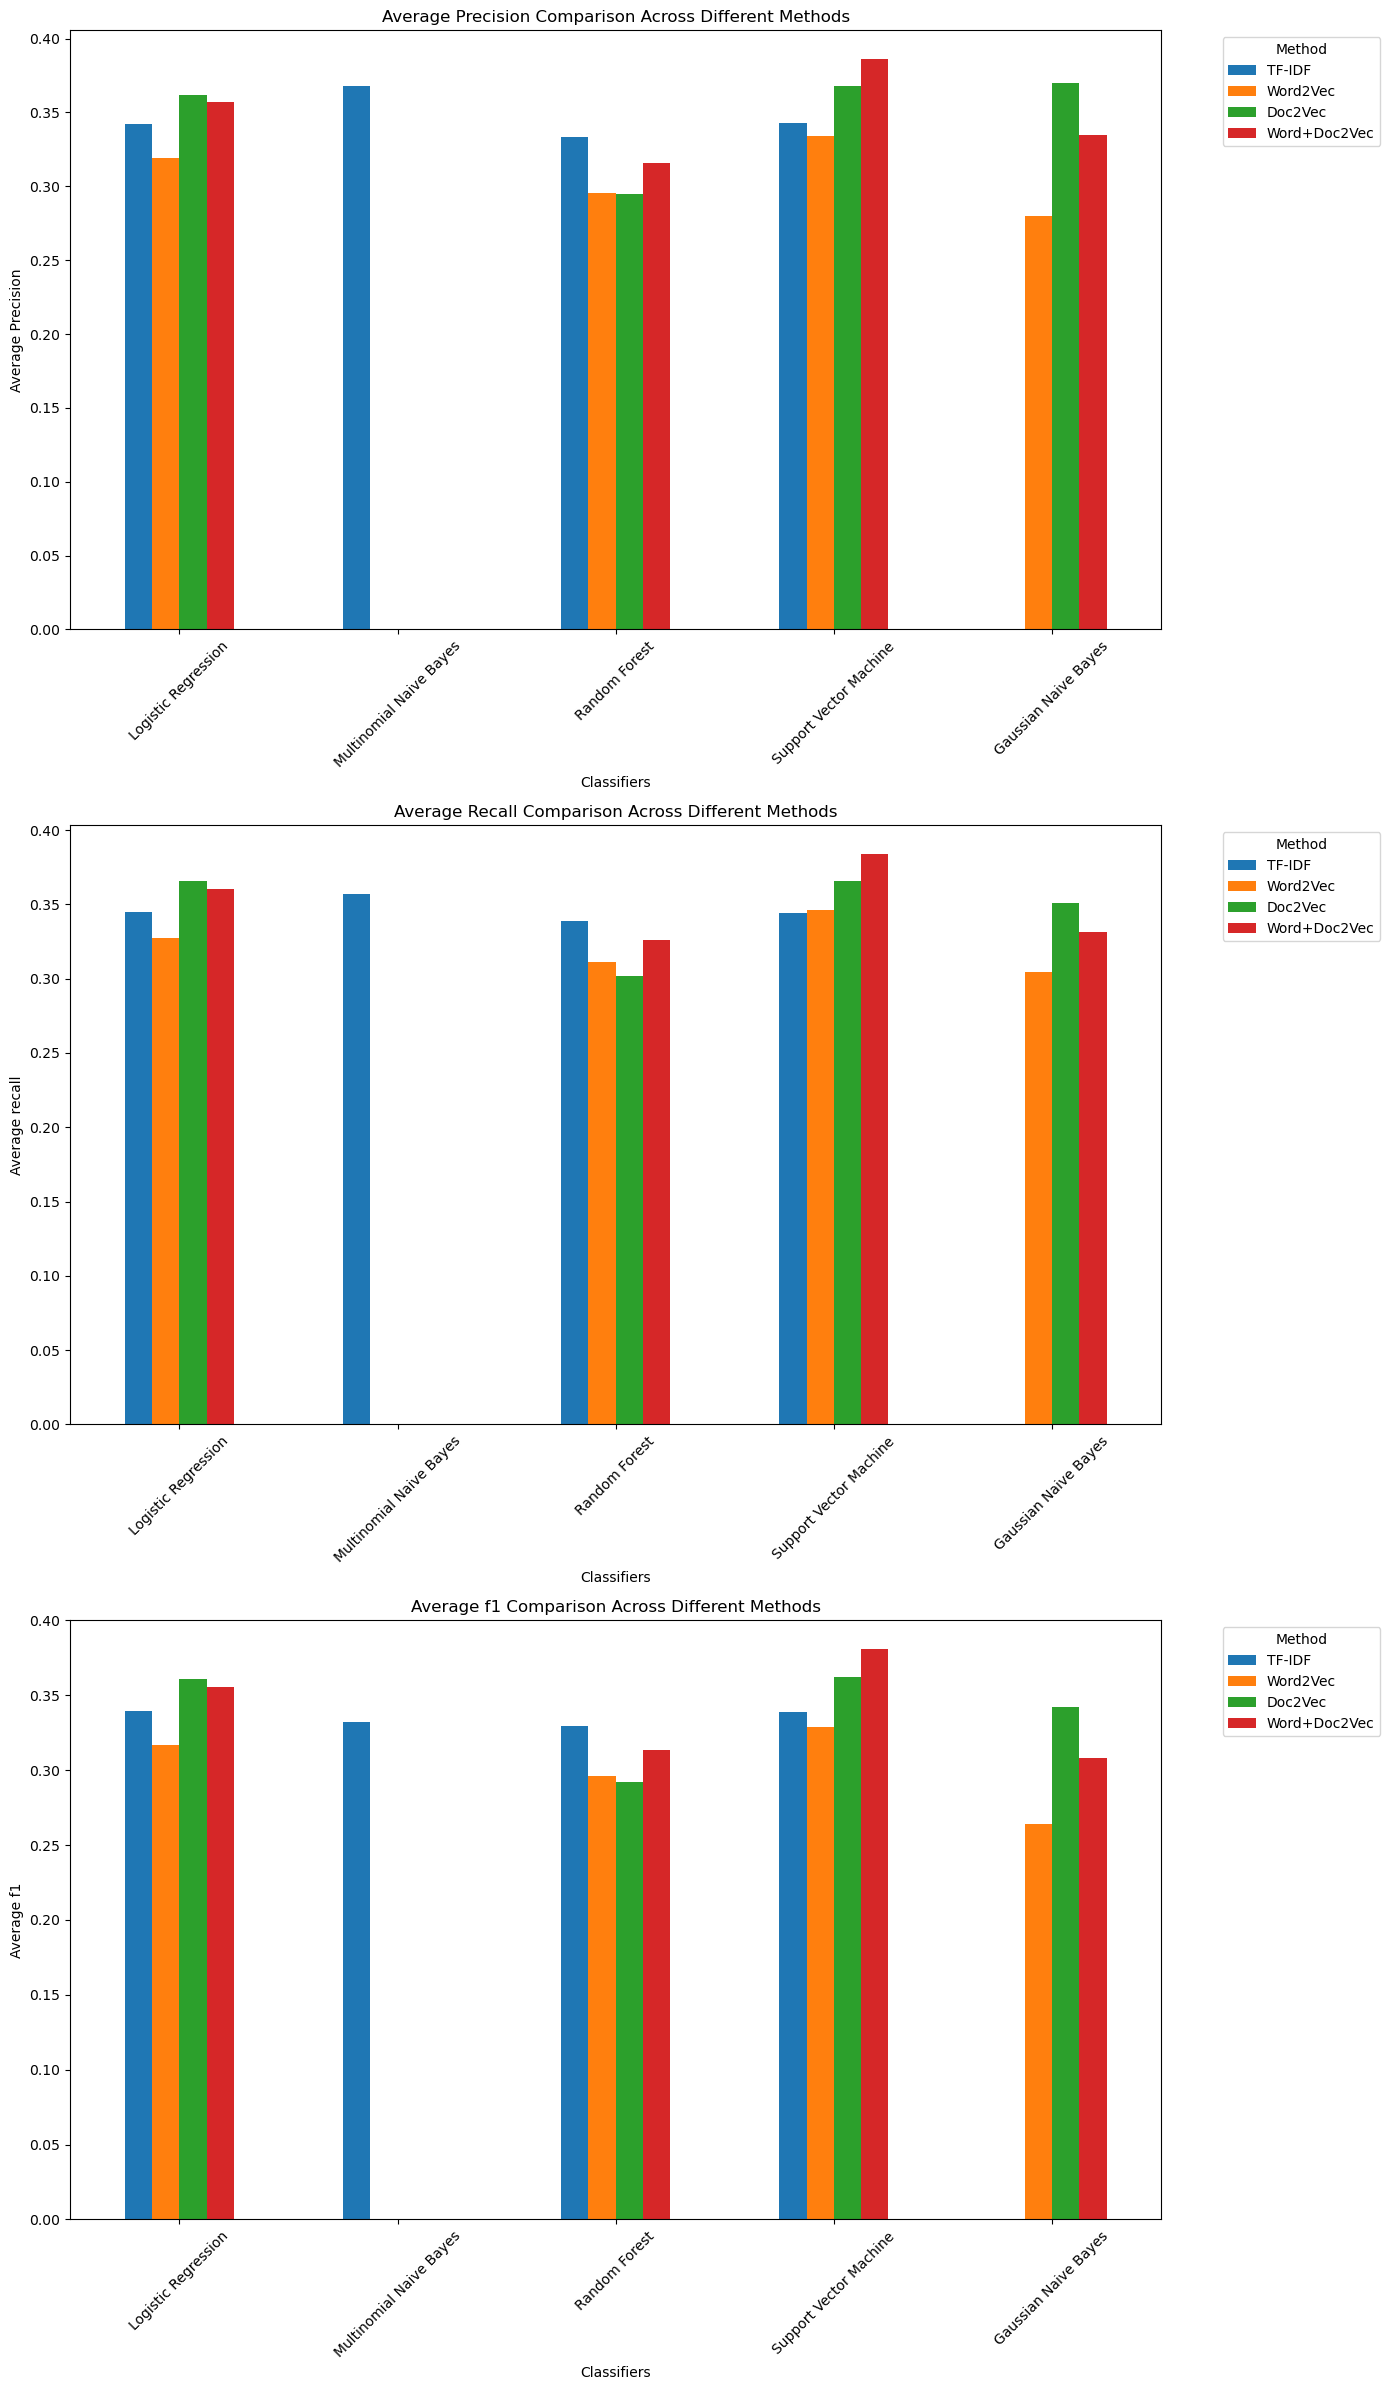

In [14]:
# Creating a grid of plots
fig, axs = plt.subplots(3, 1, figsize=(14, 24))

# Plotting average precision
all_precisions.plot(kind='bar', ax=axs[0])
axs[0].set_title('Average Precision Comparison Across Different Methods')
axs[0].set_ylabel('Average Precision')
axs[0].set_xlabel('Classifiers')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plotting average recall
all_recalls.plot(kind='bar', ax=axs[1])
axs[1].set_title('Average Recall Comparison Across Different Methods')
axs[1].set_ylabel('Average recall')
axs[1].set_xlabel('Classifiers')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plotting average F1 score
all_f1s.plot(kind='bar', ax=axs[2])
axs[2].set_title('Average f1 Comparison Across Different Methods')
axs[2].set_ylabel('Average f1')
axs[2].set_xlabel('Classifiers')
axs[2].tick_params(axis='x', rotation=45)
axs[2].legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('5_classification_results_grouped.png')  # Save the figure
plt.show()

### Figure 6

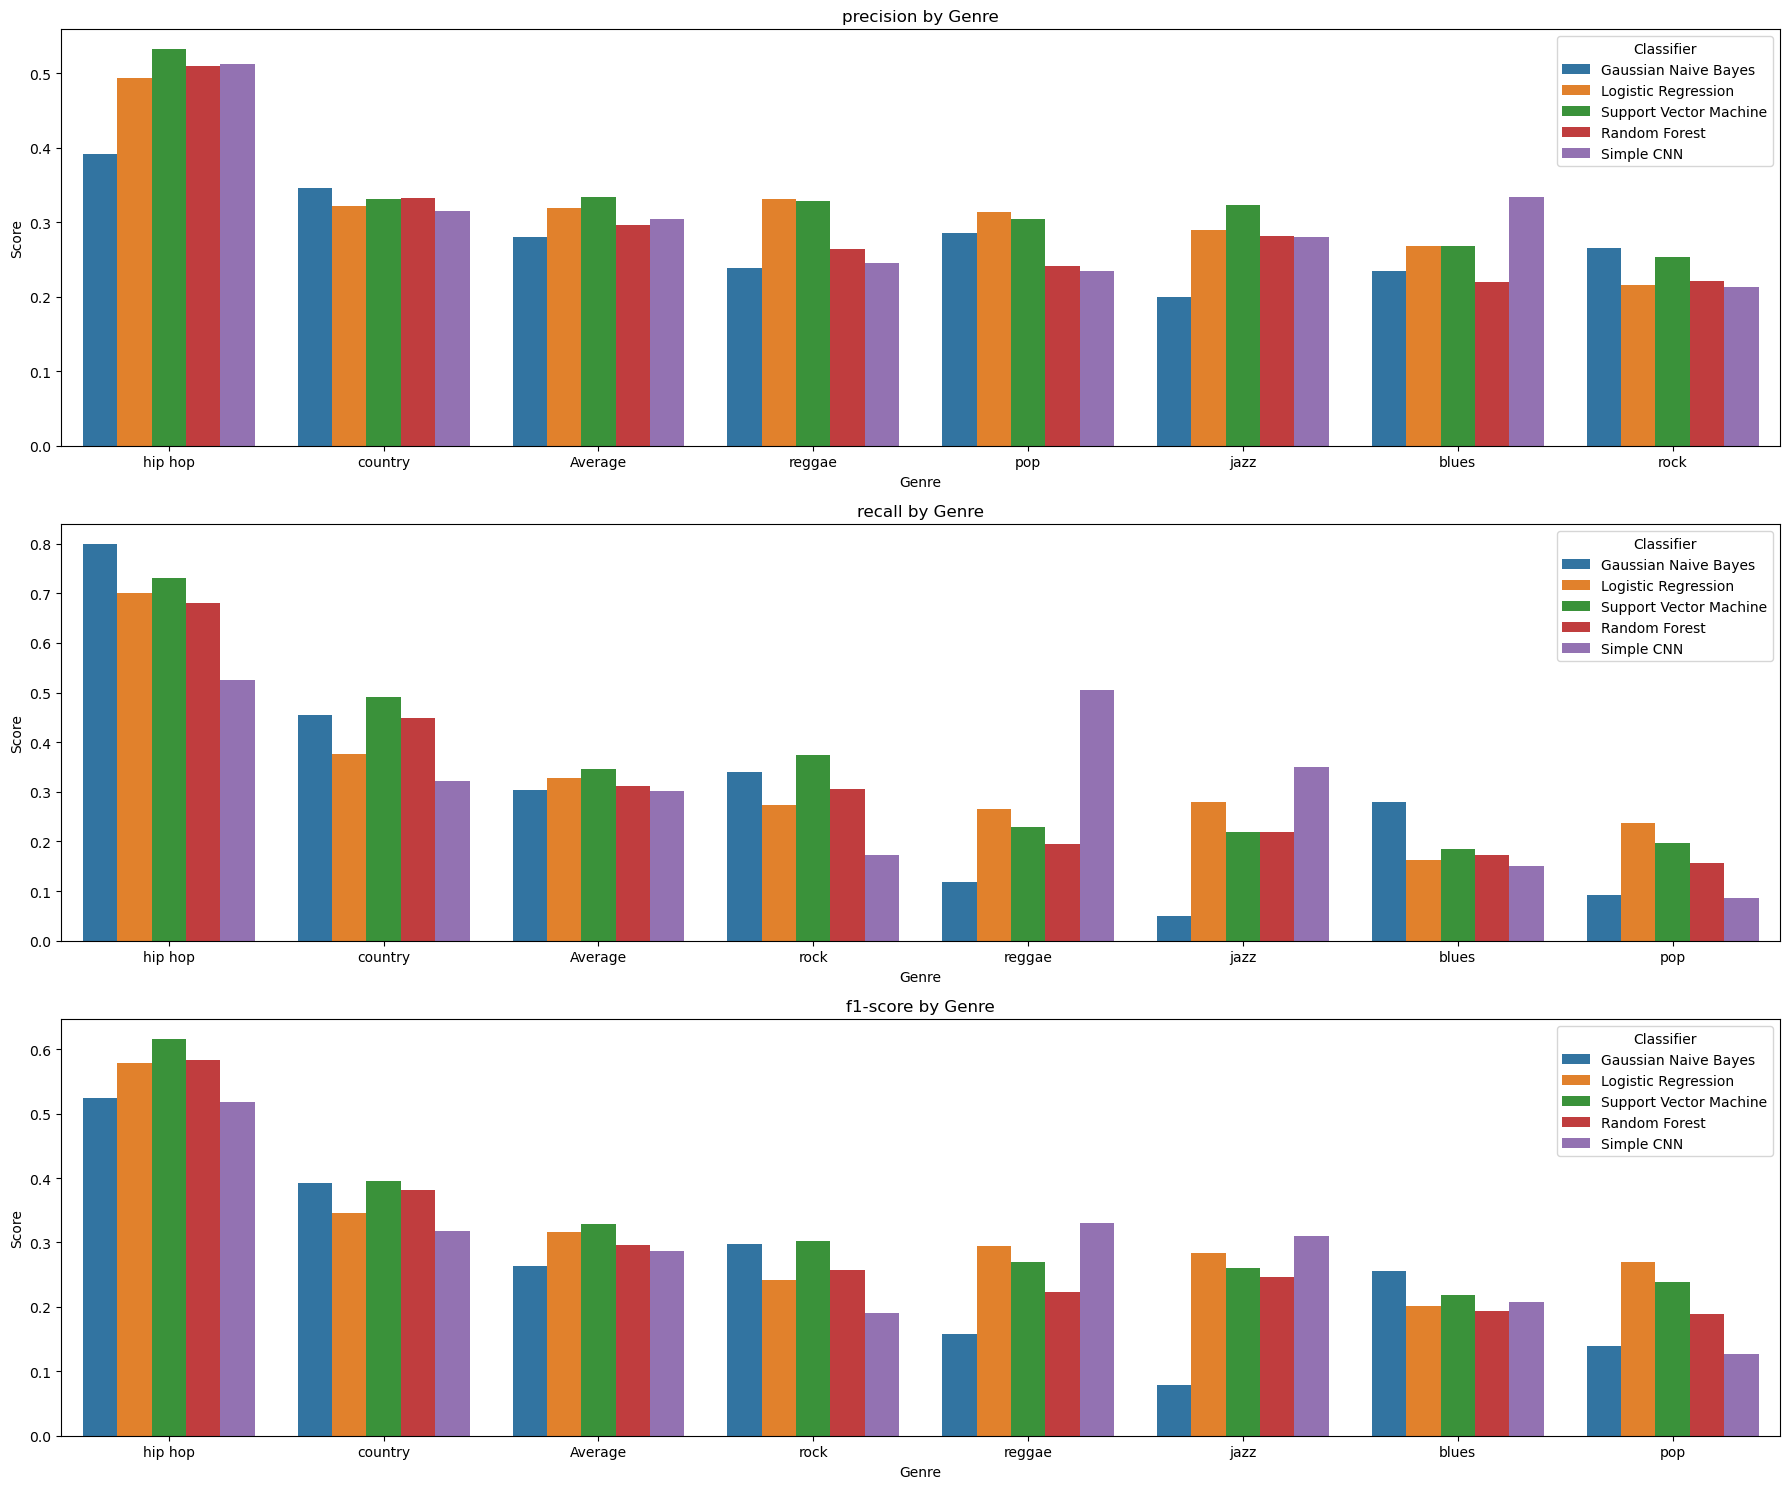

In [15]:
# Calculate the average score for each classifier across all genres
avg_scores = combined_results_df.groupby(['Classifier', 'Metric'])['Score'].mean().reset_index()
avg_scores['Genre'] = 'Average'

# Append these averages to the original DataFrame
extended_results_df = pd.concat([combined_results_df, avg_scores], ignore_index=True)

# Plotting
plt.figure(figsize=(18, 15))

for i, metric in enumerate(extended_results_df['Metric'].unique(), 1):
    metric_df = extended_results_df[extended_results_df['Metric'] == metric]
    # Order genres based on their average score for the current metric
    ordered_genres = metric_df.groupby('Genre')['Score'].mean().sort_values(ascending=False).index

    plt.subplot(3, 1, i)
    sns.barplot(x='Genre', y='Score', hue='Classifier', data=metric_df, order=ordered_genres)
    plt.title(f'{metric} by Genre')
    plt.ylabel('Score')
    plt.xlabel('Genre')
    plt.legend(title='Classifier')

plt.tight_layout()
plt.savefig('6_classification_results_genres.png')  # Save the figure
plt.show()


### 2.3.0 Clustering Task: Agglomerative

In [16]:
from sklearn.cluster import AgglomerativeClustering

# Vectorize the Lyrics using Word2Vec
def lyrics_to_avg_vector(lyrics, model):
    words = word_tokenize(lyrics)
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(word_vectors, axis=0)

# Vectorize the Lyrics using Doc2Vec
def lyrics_to_vector(lyrics, model):
    return model.infer_vector(word_tokenize(lyrics))

# Vectorize the Lyrics using combined Word2Vec and Doc2Vec
def lyrics_to_combined_vector(lyrics, w2v_model, d2v_model):
    words = word_tokenize(lyrics)
    w2v_vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    d2v_vector = d2v_model.infer_vector(words)
    if len(w2v_vectors) == 0:
        return np.concatenate((np.zeros(w2v_model.vector_size), d2v_vector))
    else:
        avg_w2v_vector = np.mean(w2v_vectors, axis=0)
        return np.concatenate((avg_w2v_vector, d2v_vector))

    # Function to perform clustering and return cluster labels
def perform_clustering(linkage_method, vectors):
    cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage=linkage_method)
    return cluster.fit_predict(vectors)

avg_vectors_w2v = np.array([lyrics_to_avg_vector(lyric, word2vec_model) for lyric in undersampled_data['lyrics_lemm']])
vectors_d2v = np.array([lyrics_to_vector(lyric, doc2vec_model) for lyric in undersampled_data['lyrics_lemm']])
combined_vectors = np.array([lyrics_to_combined_vector(lyric, word2vec_model, doc2vec_model) for lyric in undersampled_data['lyrics_lemm']])


# Apply different linkage methods for combined vectors
single_labels_wd2v = perform_clustering('single', combined_vectors)
average_labels_wd2v = perform_clustering('average', combined_vectors)
complete_labels_wd2v = perform_clustering('complete', combined_vectors)

# Add the cluster labels to the DataFrame for comparison
undersampled_data['single_label_wd2v'] = single_labels_wd2v
undersampled_data['average_label_wd2v'] = average_labels_wd2v
undersampled_data['complete_label_wd2v'] = complete_labels_wd2v



# Apply different linkage methods for Word2Vec
single_labels_w2v = perform_clustering('single', avg_vectors_w2v)
average_labels_w2v = perform_clustering('average', avg_vectors_w2v)
complete_labels_w2v = perform_clustering('complete', avg_vectors_w2v)

# Apply different linkage methods for Doc2Vec
single_labels_d2v = perform_clustering('single', vectors_d2v)
average_labels_d2v = perform_clustering('average', vectors_d2v)
complete_labels_d2v = perform_clustering('complete', vectors_d2v)

# Add the cluster labels to the DataFrame for comparison
undersampled_data['single_label_w2v'] = single_labels_w2v
undersampled_data['average_label_w2v'] = average_labels_w2v
undersampled_data['complete_label_w2v'] = complete_labels_w2v
undersampled_data['single_label_d2v'] = single_labels_d2v
undersampled_data['average_label_d2v'] = average_labels_d2v
undersampled_data['complete_label_d2v'] = complete_labels_d2v

# Convert dictionary to DataFrame
undersampled_df = pd.DataFrame(undersampled_data)

# Analyze the results for each method and model
for model_name, model_labels in [('W2V', 'w2v'), ('D2V', 'd2v')]:
    for method in ['single_label', 'average_label', 'complete_label']:
        full_method_name = f"{method}_{model_labels}"
        clustered_genres = undersampled_df.groupby(full_method_name)['genre'].value_counts()
        
# Analyze the results for each method
for method in ['single_label_wd2v', 'average_label_wd2v', 'complete_label_wd2v']:
    clustered_genres = undersampled_data.groupby(method)['genre'].value_counts()
    
    
# Function to transform and count genres in clusters
def count_genres_in_clusters(method_name):
    grouped = undersampled_data.groupby([method_name, 'genre']).size().reset_index(name='count')
    pivot = grouped.pivot(index='genre', columns=method_name, values='count').fillna(0)
    return pivot


# Count genres in clusters for each method
single_counts_w2v = count_genres_in_clusters('single_label_w2v')
average_counts_w2v = count_genres_in_clusters('average_label_w2v')
complete_counts_w2v = count_genres_in_clusters('complete_label_w2v')
single_counts_d2v = count_genres_in_clusters('single_label_d2v')
average_counts_d2v = count_genres_in_clusters('average_label_d2v')
complete_counts_d2v = count_genres_in_clusters('complete_label_d2v')
single_counts_wd2v = count_genres_in_clusters('single_label_wd2v')
average_counts_wd2v = count_genres_in_clusters('average_label_wd2v')
complete_counts_wd2v = count_genres_in_clusters('complete_label_wd2v')



/Users/ameiltailor/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ameiltailor/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ameiltailor/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ameiltailor/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ameiltailor/opt/anaconda3/lib/python3.9/site-packages/sklearn/clu

### 2.3.2 Clustering Task: Distance (K-Means)

In [17]:
from sklearn.cluster import KMeans

# Function to perform K-means clustering
def perform_kmeans_clustering(vectors, n_clusters=7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_SEED).fit(vectors)
    return kmeans.labels_

# Apply K-means for Word2Vec, Doc2Vec, and combined vectors
kmeans_labels_w2v = perform_kmeans_clustering(avg_vectors_w2v)
kmeans_labels_d2v = perform_kmeans_clustering(vectors_d2v)
kmeans_labels_wd2v = perform_kmeans_clustering(combined_vectors)

# Add the cluster labels to the DataFrame
undersampled_data['kmeans_label_w2v'] = kmeans_labels_w2v
undersampled_data['kmeans_label_d2v'] = kmeans_labels_d2v
undersampled_data['kmeans_label_wd2v'] = kmeans_labels_wd2v

# Function to count genres in clusters
def count_genres_in_k_clusters(method_name):
    grouped = undersampled_data.groupby([method_name, 'genre']).size().reset_index(name='count')
    pivot = grouped.pivot(index='genre', columns=method_name, values='count').fillna(0)
    return pivot

# Count genres in clusters for K-means
kmeans_counts_w2v = count_genres_in_k_clusters('kmeans_label_w2v')
kmeans_counts_d2v = count_genres_in_k_clusters('kmeans_label_d2v')
kmeans_counts_wd2v = count_genres_in_k_clusters('kmeans_label_wd2v')


/Users/ameiltailor/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ameiltailor/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ameiltailor/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 2.3.3 Clustering Task: Evaluation

In [18]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score

#Function to calculate metrics
def calculate_metrics(vectors, true_labels, predicted_labels):
    silhouette_avg = silhouette_score(vectors, predicted_labels)
    ari_score = adjusted_rand_score(true_labels, predicted_labels)
    mi_score = adjusted_mutual_info_score(true_labels, predicted_labels, average_method='arithmetic')
    return silhouette_avg, ari_score, mi_score

# Metrics storage
metrics = {}

# Clustering and metrics calculation
for model_name, vectors in [('W2V', avg_vectors_w2v), ('D2V', vectors_d2v), ('W2V+D2V', combined_vectors)]:
    for method in ['single', 'average', 'complete', 'kmeans']:
        if method != 'kmeans':
            # Agglomerative Clustering
            labels = perform_clustering(method, vectors)
        else:
            # K-means Clustering
            labels = perform_kmeans_clustering(vectors)

        method_name = f"{method}_{model_name}"
        undersampled_data[method_name] = labels

        # Calculate metrics
        true_labels = undersampled_data['genre'].values
        silhouette_avg, ari_score, mi_score = calculate_metrics(vectors, true_labels, labels)
        metrics[(model_name, method, 'Silhouette')] = silhouette_avg
        metrics[(model_name, method, 'ARI')] = ari_score
        metrics[(model_name, method, 'MI')] = mi_score


/Users/ameiltailor/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ameiltailor/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ameiltailor/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ameiltailor/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ameiltailor/opt/anaconda3/lib/python3.9/sit

### Figure 7

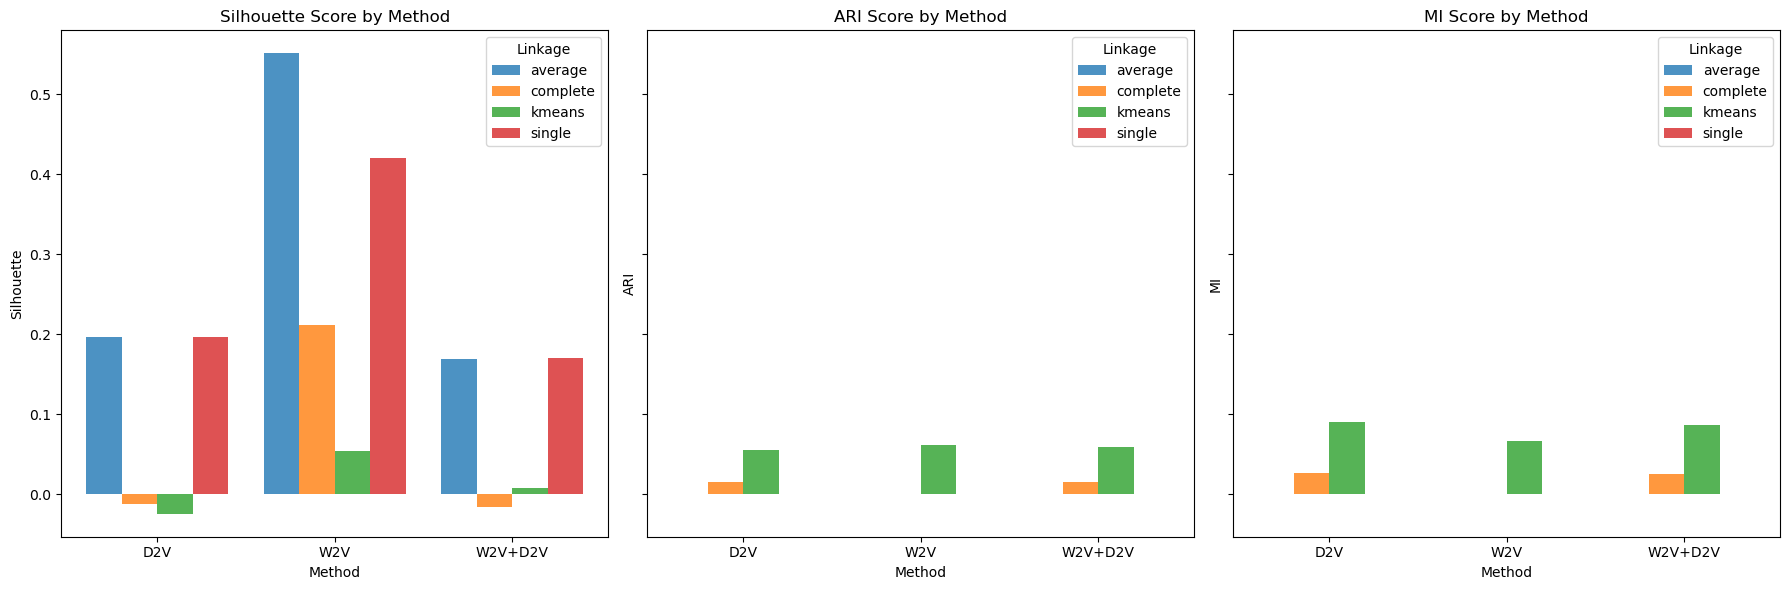

In [19]:
# Extracting the unique methods, linkages, and metrics from the keys
methods = sorted(set(key[0] for key in metrics.keys()))
linkages = sorted(set(key[1] for key in metrics.keys()))
metrics_list = ['Silhouette', 'ARI', 'MI']

# Preparing the data for the grouped bar chart
# Initialize the dictionary to hold the scores
scores = {metric: {linkage: [] for linkage in linkages} for metric in metrics_list}

# Populate the scores dictionary with the values from the metrics dictionary
for (method, linkage, metric), value in metrics.items():
    if metric in metrics_list:
        scores[metric][linkage].append((method, value))

# Sort the scores for consistent ordering
for metric in scores:
    for linkage in scores[metric]:
        scores[metric][linkage].sort()

# Creating the bar plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
bar_width = 0.2
index = np.arange(len(methods))

for ax, metric in zip(axes, metrics_list):
    for i, linkage in enumerate(linkages):
        values = [value for method, value in scores[metric][linkage] if method in methods]
        ax.bar(index + i * bar_width, values, bar_width, alpha=0.8, label=linkage)
    
    ax.set_xlabel('Method')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Score by Method')
    ax.set_xticks(index + bar_width / 2 * (len(linkages) - 1))
    ax.set_xticklabels(methods)
    ax.legend(title='Linkage')

plt.tight_layout()
plt.savefig('7_cluster_evaluation.png')  # Save the figure
plt.show()

### 2.3.4 Clustering Task: LDA

In [20]:
from sklearn.decomposition import LatentDirichletAllocation


# Creating TF-IDF models
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(undersampled_data['lyrics_lemm'].tolist())

tfidf_vectorizer_500 = TfidfVectorizer(max_features=500)
tfidf_matrix_500 = tfidf_vectorizer_500.fit_transform(undersampled_data['lyrics_lemm'].tolist())

# Fitting LDA models
lda = LatentDirichletAllocation(n_components=7, random_state=RANDOM_SEED)
lda_topics = lda.fit_transform(tfidf_matrix)
lda_topics_500 = lda.fit_transform(tfidf_matrix_500)

# Creating DataFrame with topic probabilities and genres
topic_probs_df = pd.DataFrame(lda_topics, columns=[f'Topic {i+1}' for i in range(7)])
topic_probs_df['genre'] = list(undersampled_data["genre"])

# Creating cross-tabulation of genres and dominant topics
topic_probs_df['dominant_topic_all'] = lda_topics.argmax(axis=1)
topic_probs_df['dominant_topic_500'] = lda_topics_500.argmax(axis=1)

genre_topic_matrix_all = pd.crosstab(topic_probs_df['genre'], topic_probs_df['dominant_topic_all'], normalize='index')
genre_topic_percentage_all = genre_topic_matrix_all.apply(lambda r: r/r.sum(), axis=1)

genre_topic_matrix_500 = pd.crosstab(topic_probs_df['genre'], topic_probs_df['dominant_topic_500'], normalize='index')
genre_topic_percentage_500 = genre_topic_matrix_500.apply(lambda r: r/r.sum(), axis=1)


### Figure 8

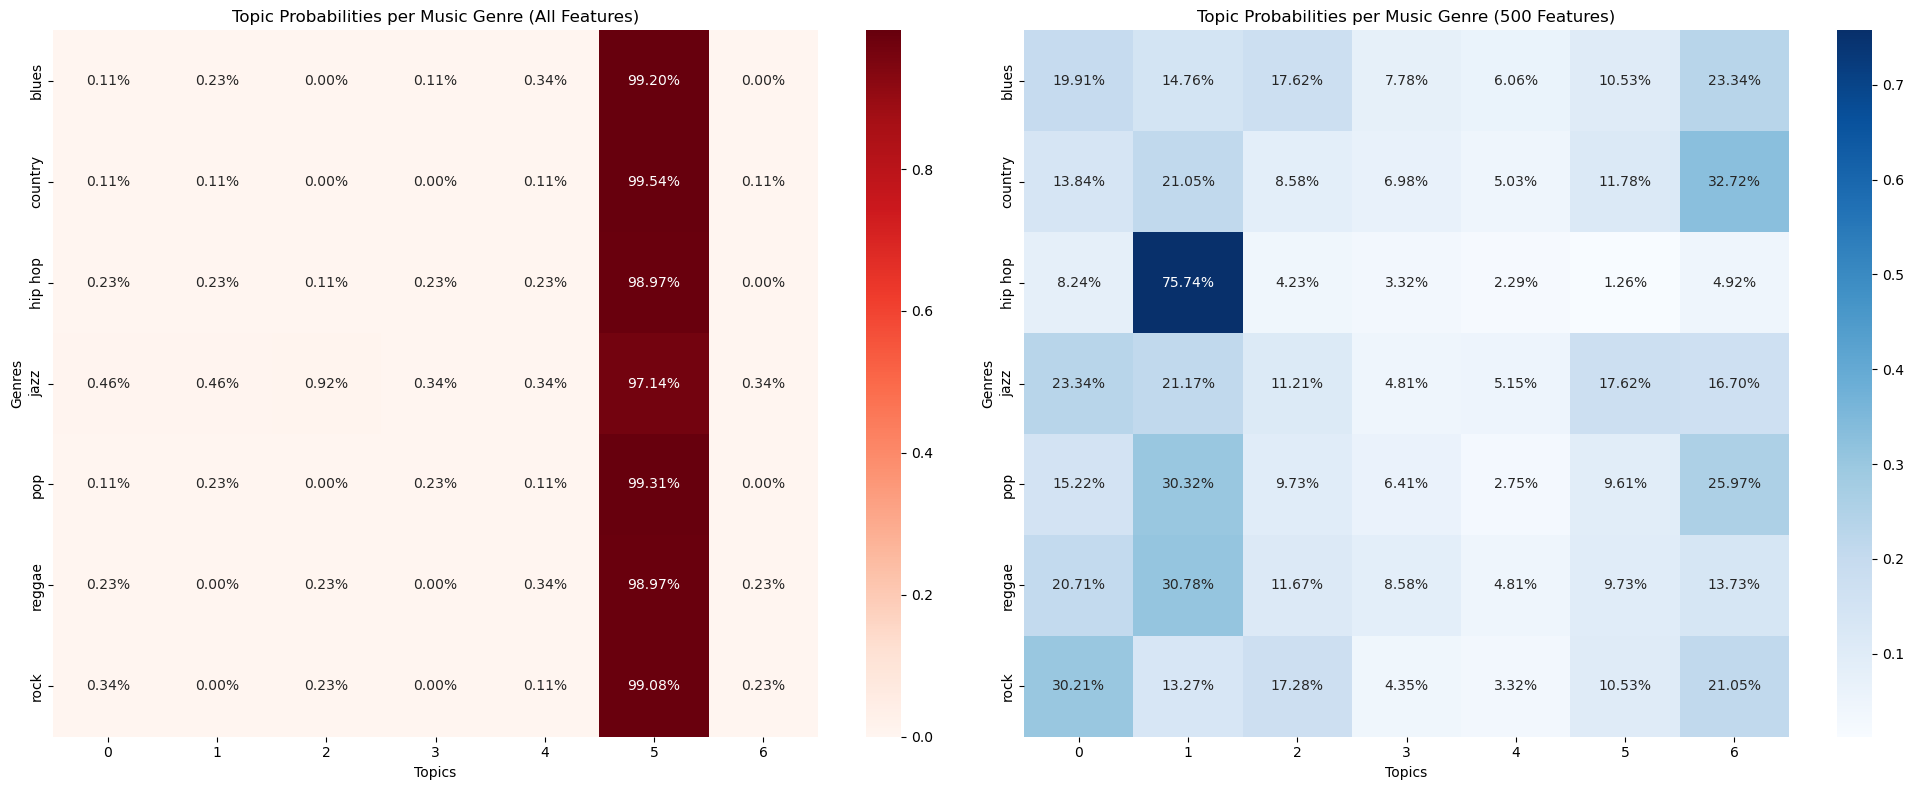

In [21]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for all features
sns.heatmap(genre_topic_percentage_all, annot=True, cmap='Reds', fmt=".2%", ax=axes[0])
axes[0].set_title('Topic Probabilities per Music Genre (All Features)')
axes[0].set_xlabel('Topics')
axes[0].set_ylabel('Genres')

# Heatmap for limited features
sns.heatmap(genre_topic_percentage_500, annot=True, cmap='Blues', fmt=".2%", ax=axes[1])
axes[1].set_title('Topic Probabilities per Music Genre (500 Features)')
axes[1].set_xlabel('Topics')
axes[1].set_ylabel('Genres')

plt.tight_layout()
plt.savefig('8_LDA_heatmaps.png')  # Save the figure
plt.show()